# Image Destortion

Doel van deze file is om een neurale netwerk te verwarren (adversarial learning). De neurale netwerk moet het eindresultaat misclassificeren. We gaan werken met images. Op de images moeten dus ruis geplaatst worden.

### Importeer Libraries

In [59]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions

import tensorflow as tf

### Laad model

In [60]:
densenet_model = tf.keras.applications.DenseNet201(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)

### Bekijk images

In [61]:
target_size = (224, 224)

In [62]:
mustang = image.img_to_array(image.load_img('mustang.jpg', target_size=target_size))/255
panda = image.img_to_array(image.load_img('panda.jpg', target_size=target_size))/255
gitaar = image.img_to_array(image.load_img('guitar.jpg', target_size=target_size))/255

In [63]:
images = [mustang, panda, gitaar]

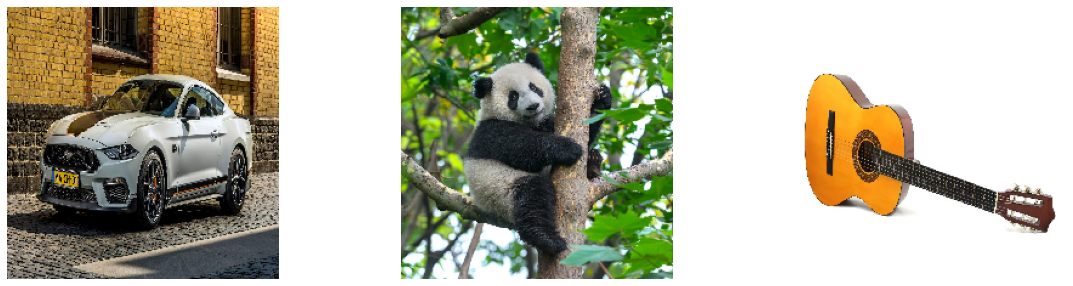

In [64]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

for i, img in enumerate(images):
    axes[i].imshow(img)
    axes[i].axis('off')

plt.show()

### Probabilities

In [69]:
def get_probablilities(img):

    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)

    preds = densenet_model.predict(x)
    
    return decode_predictions(preds, top=3)[0]

##### distorted

normaal


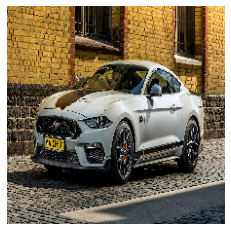

2022-05-06 02:46:27.421113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


probs:  [('n03100240', 'convertible', 0.10338478), ('n02974003', 'car_wheel', 0.10316356), ('n04037443', 'racer', 0.074827895)]
distorted


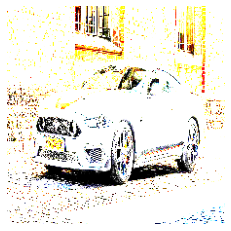

probs:  [('n03729826', 'matchstick', 0.08128471), ('n04286575', 'spotlight', 0.039069604), ('n03666591', 'lighter', 0.03445752)]

normaal


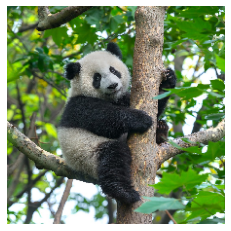

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


probs:  [('n02510455', 'giant_panda', 0.8452528), ('n01882714', 'koala', 0.046634506), ('n02500267', 'indri', 0.044717617)]
distorted


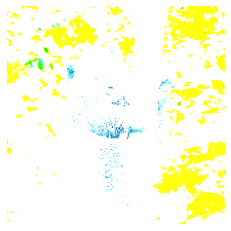

probs:  [('n03729826', 'matchstick', 0.08448817), ('n04286575', 'spotlight', 0.039202854), ('n03666591', 'lighter', 0.03519701)]

normaal


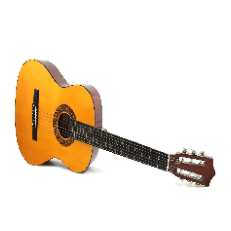

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


probs:  [('n02676566', 'acoustic_guitar', 0.92557454), ('n02787622', 'banjo', 0.029823389), ('n03970156', 'plunger', 0.009684844)]
distorted


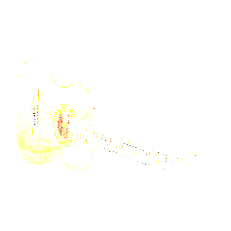

probs:  [('n03729826', 'matchstick', 0.07904466), ('n04286575', 'spotlight', 0.037352335), ('n03666591', 'lighter', 0.033210702)]



In [70]:
distortion_size = 10

for img in images:
    print('normaal')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    distorted_image = img * distortion_size
    print('probs: ', get_probablilities(distorted_image))

    print('distorted')
    plt.imshow(img * 15)
    plt.axis('off')
    plt.show()
    print('probs: ', get_probablilities(distorted_image))
    print()


### Evaluatie

Door de pixels te veranderen, oftewel een image te vervormen, kun je ervoor zorgen dat de kans dat de model het goed heeft verlagen. Ik heb mij mijn voorbeeld de array * 20 te gedaan. Dit geeft die gele/blauwe lege images die je hierboven kunt zien. Als je het x2 zou doen, zou het wel nog op de oorspronkelijke image lijken.